#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../complaints.csv')
df.head()

/var/folders/hq/f_rzh7j51m1ddfp3xw6s1qsr0000gn/T/ipykernel_26251/999401346.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../complaints.csv')


Date received                                            Product  \
0    2024-02-28  Credit reporting or other personal consumer re...   
1    2024-02-23  Credit reporting or other personal consumer re...   
2    2024-02-22  Credit reporting or other personal consumer re...   
3    2024-02-22  Credit reporting or other personal consumer re...   
4    2024-02-22  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting  Problem with a company's investigation into an...   
1  Credit reporting                        Improper use of your report   
2  Credit reporting               Incorrect information on your report   
3  Credit reporting               Incorrect information on your report   
4  Credit reporting                        Improper use of your report   

                                           Sub-issue  \
0  Their investigation did not fix an error on yo...   
1  Credit inquiries on your report that you don't...   
2                Information belongs to someone else   
3                Information belongs to someone else   
4      Reporting company used your report improperly   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

                                  Company State ZIP code           Tags  \
0  TRANSUNION INTERMEDIATE HOLDINGS, INC.    NV    89081            NaN   
1     Experian Information Solutions Inc.    TX    76140            NaN   
2                           EQUIFAX, INC.    FL    33173            NaN   
3         Resurgent Capital Services L.P.    NJ    08075  Servicemember   
4                           EQUIFAX, INC.    CA    91302            NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web           2024-02-28   
1                      Other           Web           2024-02-23   
2                      Other           Web           2024-02-22   
3                        NaN           Web           2024-02-22   
4                        NaN           Web           2024-02-22   

  Company response to consumer Timely response? Consumer disputed?  \
0                  In progress              Yes                NaN   
1                  In progress              Yes                NaN   
2                  In progress              Yes                NaN   
3      Closed with explanation              Yes                NaN   
4                  In progress              Yes                NaN   

   Complaint ID  
0       8436094  
1       8404915  
2       8391349  
3       8391367  
4       8391001

In [3]:
df['Date received'] = pd.to_datetime(df['Date received'])
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        729128
Consumer complaint narrative    3083057
Company public response         2524796
Company                               0
State                             44576
ZIP code                          30224
Tags                            4329064
Consumer consent provided?       969551
Submitted via                         0
Date sent to company                  0
Company response to consumer          9
Timely response?                      0
Consumer disputed?              4026225
Complaint ID                          0
dtype: int64

In [4]:
df.shape

(4794541, 18)

#### Choosing only required columns

In [5]:
cols_to_consider = ['Product','Sub-product','Issue','Sub-issue','Consumer complaint narrative','Company public response','Company',
                    'State', 'ZIP code', 'Date received']
df_new = df[cols_to_consider]
df_new.head()

Product       Sub-product  \
0  Credit reporting or other personal consumer re...  Credit reporting   
1  Credit reporting or other personal consumer re...  Credit reporting   
2  Credit reporting or other personal consumer re...  Credit reporting   
3  Credit reporting or other personal consumer re...  Credit reporting   
4  Credit reporting or other personal consumer re...  Credit reporting   

                                               Issue  \
0  Problem with a company's investigation into an...   
1                        Improper use of your report   
2               Incorrect information on your report   
3               Incorrect information on your report   
4                        Improper use of your report   

                                           Sub-issue  \
0  Their investigation did not fix an error on yo...   
1  Credit inquiries on your report that you don't...   
2                Information belongs to someone else   
3                Information belongs to someone else   
4      Reporting company used your report improperly   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

                                  Company State ZIP code Date received  
0  TRANSUNION INTERMEDIATE HOLDINGS, INC.    NV    89081    2024-02-28  
1     Experian Information Solutions Inc.    TX    76140    2024-02-23  
2                           EQUIFAX, INC.    FL    33173    2024-02-22  
3         Resurgent Capital Services L.P.    NJ    08075    2024-02-22  
4                           EQUIFAX, INC.    CA    91302    2024-02-22

In [6]:
df_new.isna().sum()

Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        729128
Consumer complaint narrative    3083057
Company public response         2524796
Company                               0
State                             44576
ZIP code                          30224
Date received                         0
dtype: int64

#### Dropping all NA values

In [7]:
df_new = df_new.dropna()

In [8]:
df_new.shape

(773703, 10)

In [9]:
df_new.head()

Product  \
48                                         Credit card   
83   Credit reporting or other personal consumer re...   
132                        Checking or savings account   
135                                    Debt collection   
142                        Checking or savings account   

                                    Sub-product  \
48   General-purpose credit card or charge card   
83                             Credit reporting   
132                            Checking account   
135                               I do not know   
142                            Checking account   

                                               Issue  \
48   Problem with a purchase shown on your statement   
83                       Improper use of your report   
132                               Opening an account   
135                Attempts to collect debt not owed   
142                              Managing an account   

                                             Sub-issue  \
48   Credit card company isn't resolving a dispute ...   
83       Reporting company used your report improperly   
132          Didn't receive terms that were advertised   
135                                  Debt is not yours   
142                  Problem using a debit or ATM card   

                          Consumer complaint narrative  \
48   I paid {$1000.00} to have artwork restored, ma...   
83   Subject : Cease and Desist Letter Regarding Un...   
132  Hello, I opened a new account with Wells Fargo...   
135  This issue shows that I opened an account on X...   
142  I filed a claim with Wells fargo, my purse was...   

                               Company public response  \
48   Company has responded to the consumer and the ...   
83   Company has responded to the consumer and the ...   
132  Company has responded to the consumer and the ...   
135  Company has responded to the consumer and the ...   
142  Company has responded to the consumer and the ...   

                           Company State ZIP code Date received  
48                  CITIBANK, N.A.    LA    701XX    2024-02-17  
83   PENTAGON FEDERAL CREDIT UNION    NJ    07753    2024-02-17  
132          WELLS FARGO & COMPANY    CA    92648    2024-02-13  
135   FIRST NATIONAL BANK OF OMAHA    AZ    85014    2024-02-12  
142          WELLS FARGO & COMPANY    MN    553XX    2024-02-14

#### Taking just 2023 data

In [10]:
df_2023 = df_new[df_new['Date received'].dt.year.isin([2023])].reset_index(drop=True)
df_2023.head()

Product  \
0                        Checking or savings account   
1  Credit reporting or other personal consumer re...   
2                                    Debt collection   
3                                    Debt collection   
4  Credit reporting or other personal consumer re...   

                        Sub-product  \
0  Other banking product or service   
1                  Credit reporting   
2                        Other debt   
3                        Other debt   
4                  Credit reporting   

                                               Issue  \
0                                 Opening an account   
1  Problem with a company's investigation into an...   
2                  Attempts to collect debt not owed   
3                  Attempts to collect debt not owed   
4               Incorrect information on your report   

                                        Sub-issue  \
0  Account opened without my consent or knowledge   
1            Investigation took more than 30 days   
2               Debt was result of identity theft   
3               Debt was result of identity theft   
4             Information belongs to someone else   

                        Consumer complaint narrative  \
0  Date : XXXX XXXXo : XXXX XXXX XXXX / XXXX XXXX...   
1  I have previously disputed this item with you ...   
2  I kindly request that you update my credit rep...   
3  I implore you to conduct a comprehensive inves...   
4  In accordance with the Fair Credit Reporting A...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1  Company has responded to the consumer and the ...   
2  Company has responded to the consumer and the ...   
3  Company has responded to the consumer and the ...   
4  Company has responded to the consumer and the ...   

                                  Company State ZIP code Date received  
0                   WELLS FARGO & COMPANY    NC    27513    2023-12-29  
1     Experian Information Solutions Inc.    MN    55124    2023-12-29  
2     Experian Information Solutions Inc.    IL    60621    2023-12-28  
3     Experian Information Solutions Inc.    NJ    08723    2023-12-28  
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    TX    77377    2023-11-27

In [11]:
df_2023.shape

(265315, 10)

In [12]:
df_2023['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    139134
Credit reporting or other personal consumer reports                              74578
Checking or savings account                                                      15157
Debt collection                                                                  11783
Credit card or prepaid card                                                       9803
Credit card                                                                       6264
Vehicle loan or lease                                                             3678
Mortgage                                                                          2290
Student loan                                                                      2281
Prepaid card                                                                       259
Payday loan, title loan, or personal loan                                           69
Payday loan, title loan, personal l

#### Merging the product categories into fewer ones

In [13]:
product_map = {'Credit reporting or other personal consumer reports' : 'Credit Reporting',
               'Credit reporting, credit repair services, or other personal consumer reports' : 'Credit Reporting',
               'Payday loan, title loan, personal loan, or advance loan' : 'Loans / Mortgage',
               'Payday loan, title loan, or personal loan' : 'Loans / Mortgage',
               'Student loan' : 'Loans / Mortgage',
               'Vehicle loan or lease' : 'Loans / Mortgage',
               'Debt collection' : 'Debt collection',
               'Credit card or prepaid card' : 'Credit/Prepaid Card',
               'Credit card' : 'Credit/Prepaid Card',
               'Prepaid card' : 'Credit/Prepaid Card',
               'Mortgage' : 'Loans / Mortgage',
               'Checking or savings account' : 'Checking or savings account'  
              }

In [14]:
df_2023.loc[:,'Product'] = df_2023['Product'].map(product_map)

In [15]:
df_2023['Product'].value_counts(normalize = True) * 100.0

Product
Credit Reporting               80.550289
Credit/Prepaid Card             6.153440
Checking or savings account     5.712832
Debt collection                 4.441136
Loans / Mortgage                3.142303
Name: proportion, dtype: float64

#### Distribution of product categories

In [16]:
product_counts = df_2023['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']

fig = px.bar(product_counts, y='Product', x='Count', color='Product',
             title="Product Count",
             labels={'Count': 'Number of Occurrences'}, 
             orientation='h') 
fig.show()

#### Sample customer narrative

In [17]:
df_2023.loc[6,'Consumer complaint narrative']

"Complaint Regarding Credit Report Inaccuracies Dear CFPB, I am writing to file a complaint regarding inaccurate information on my credit report. I have been actively disputing these inaccuracies with the credit bureaus, but they have failed to adequately investigate my claims or remove the incorrect information. In accordance with the Fair Credit Reporting Act. I attached the PDF file below containing the list of items that have violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681. \n\nCredit Bureau stated everything was complete and accurate. But how is that possible if the open date, date of last activity and much more is incorrect. According to 15 USC 1681i ( 5 ), they are supposed to modify or delete accounts that aren't reporting correctly. \n\n15 U.S.C. 1681s-2 ( A ) ( 1 ) A person shall not furnish any information relating to a consumer to any consumer reporting agency if the person knows or has reasonable cause to believe that the in

#### Product / Issue counts

In [18]:
df_2023['Product'].value_counts()

Product
Credit Reporting               213712
Credit/Prepaid Card             16326
Checking or savings account     15157
Debt collection                 11783
Loans / Mortgage                 8337
Name: count, dtype: int64

In [19]:
df_2023['Sub-product'].value_counts()

Sub-product
Credit reporting                              212469
General-purpose credit card or charge card     13695
Checking account                               12724
Other debt                                      3486
Loan                                            3240
I do not know                                   2834
Credit card debt                                2186
Federal student loan servicing                  2041
Store credit card                               1925
Conventional home mortgage                      1260
Other personal consumer report                  1243
Medical debt                                    1230
Savings account                                 1214
Other banking product or service                 952
Auto debt                                        823
FHA mortgage                                     532
Telecommunications debt                          485
Lease                                            438
Government benefit card           

In [20]:
df_2023['Issue'].value_counts()

Issue
Incorrect information on your report                                                87781
Improper use of your report                                                         62499
Problem with a credit reporting company's investigation into an existing problem    45414
Problem with a company's investigation into an existing problem                     21019
Managing an account                                                                  8067
Attempts to collect debt not owed                                                    5817
Problem with a purchase shown on your statement                                      3365
Written notification about debt                                                      2560
Closing an account                                                                   2079
Dealing with your lender or servicer                                                 1888
Problem with a lender or other company charging your account                         1832
Open

In [21]:
df_2023['Sub-issue'].value_counts()

Sub-issue
Information belongs to someone else                                      58017
Reporting company used your report improperly                            48790
Their investigation did not fix an error on your report                  45418
Credit inquiries on your report that you don't recognize                 13166
Account status incorrect                                                 10277
                                                                         ...  
Issues with financial aid services                                           1
Threatened to turn you in to immigration or deport you                       1
Did not receive car title                                                    1
Problem adding money                                                         1
Cannot graduate, receive diploma, or get transcript due to money owed        1
Name: count, Length: 206, dtype: int64

In [22]:
df_2023['Company public response'].value_counts()

Company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            252901
Company believes it acted appropriately as authorized by contract or law                                                     9604
Company believes the complaint is the result of a misunderstanding                                                            771
Company disputes the facts presented in the complaint                                                                         690
Company believes the complaint provided an opportunity to answer consumer's questions                                         520
Company believes complaint caused principally by actions of third party outside the control or direction of the company       279
Company can't verify or dispute the facts in the complaint                                                                    190
Company believes complaint is the result of an isolated error     

#### Distribution of Subproducts w.r.t Product

In [23]:
for i,product in enumerate(df_2023['Product'].value_counts().index):
    subproduct = df_2023[df_2023['Product'] == product]
    subproduct_counts = subproduct['Sub-product'].value_counts().reset_index()
    subproduct_counts.columns = ['Sub-product', 'Count']
    
    fig = px.bar(subproduct_counts, y='Sub-product', x='Count', color='Sub-product',
                 title=f"SubProduct Count for {product}",
                 width = 1200,
                 height = 400 if i!=4 else 500,
                 labels={'Count': 'Number of Occurrences'}, # Customizing axis labels
                 orientation='h') # Horizontal bars
    
    fig.update_layout(
        title={
            'text': f"Sub-product counts for {product}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
    fig.show()

#### Complaints across states

In [24]:
state_complaints = df_2023.groupby('State').size().reset_index(name='Num_complaints')
state_complaints['text'] = 'Total Complaints in 2023: ' + state_complaints['Num_complaints'].astype(str)

fig = px.choropleth(state_complaints,
                    locations='State',
                    locationmode='USA-states',
                    color='Num_complaints',
                    color_continuous_scale='Inferno',
                    scope="usa",
                    hover_name='State',  
                    hover_data={'State': False, 'Num_complaints': True},  
                    title='Number of Complaints by State')

fig.update_layout(
    autosize = True,
    title_text='Number of Complaints by State',
    title_x=0.45,
    geo=dict(
        landcolor='rgb(217, 217, 217)',  
        lakecolor='rgb(255, 255, 255)',  
        bgcolor='rgb(255, 255, 255)' 
    ),
    paper_bgcolor='rgb(255, 255, 255)', 
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

* Other `color_continuous_scale` options to vary the map color:
&nbsp;

  ['Plasma', 'Inferno', 'Magma', 'Cividis', 'Greys', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']


#### Visualizing Complaints over months

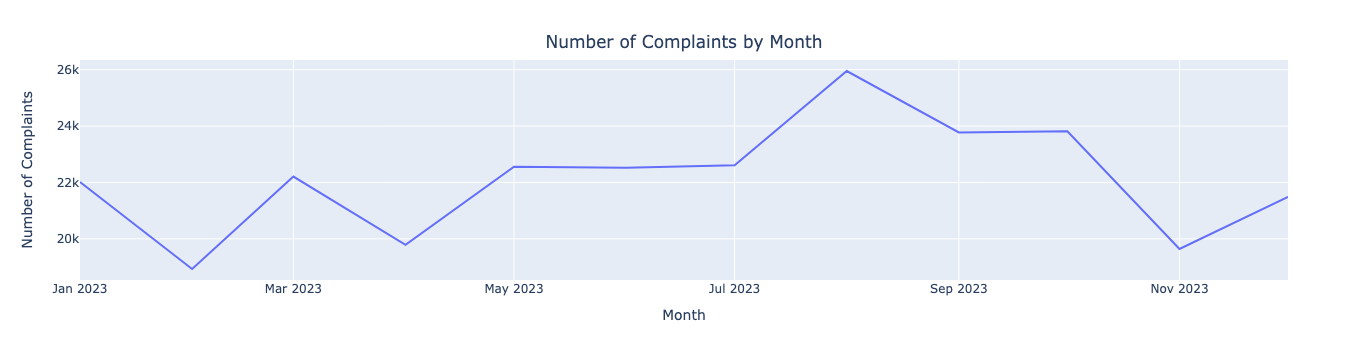

In [57]:
monthly_complaints = df_2023.copy()

monthly_complaints['MonthYear'] = monthly_complaints['Date received'].dt.to_period('M').astype(str)
monthly_complaints = monthly_complaints.groupby('MonthYear').size().reset_index(name = "NumComplaints")


fig = px.line(monthly_complaints, x='MonthYear', y='NumComplaints',
              labels={'MonthYear': 'Month', 'NumComplaints': 'Number of Complaints'})

fig.update_layout(
        title={
            'text':'Number of Complaints by Month',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
fig.show()

##### `Comments` : May not be super useful to include.

#### Distribution of Issues w.r.t Product

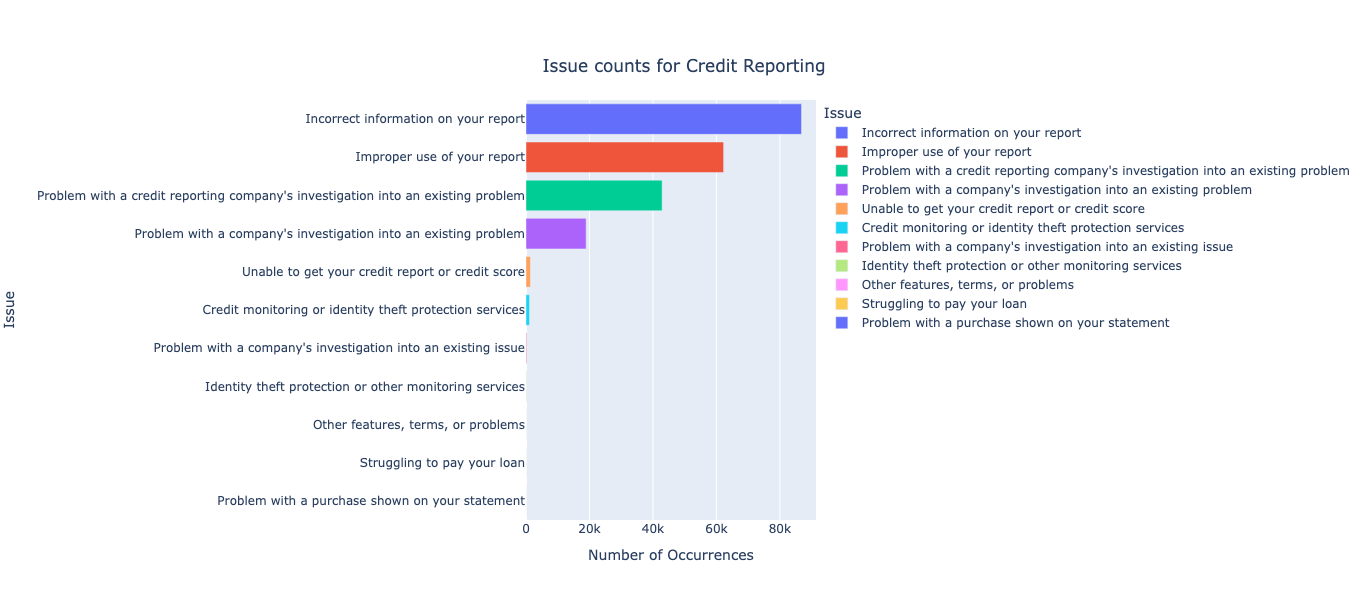

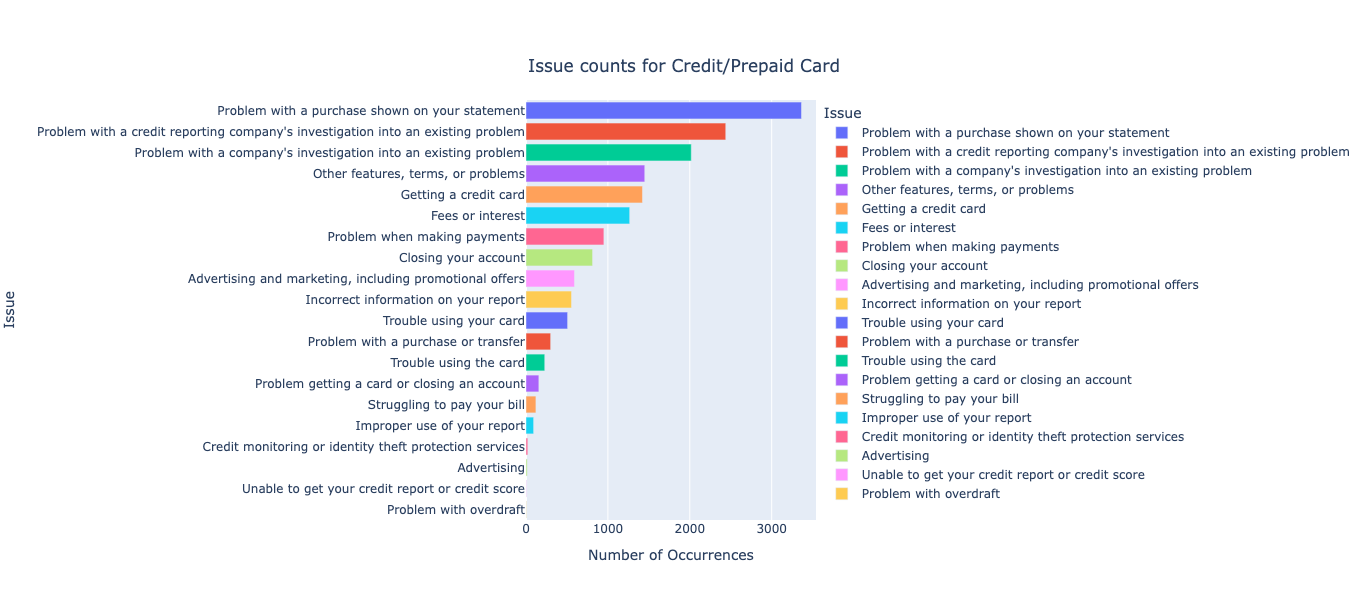

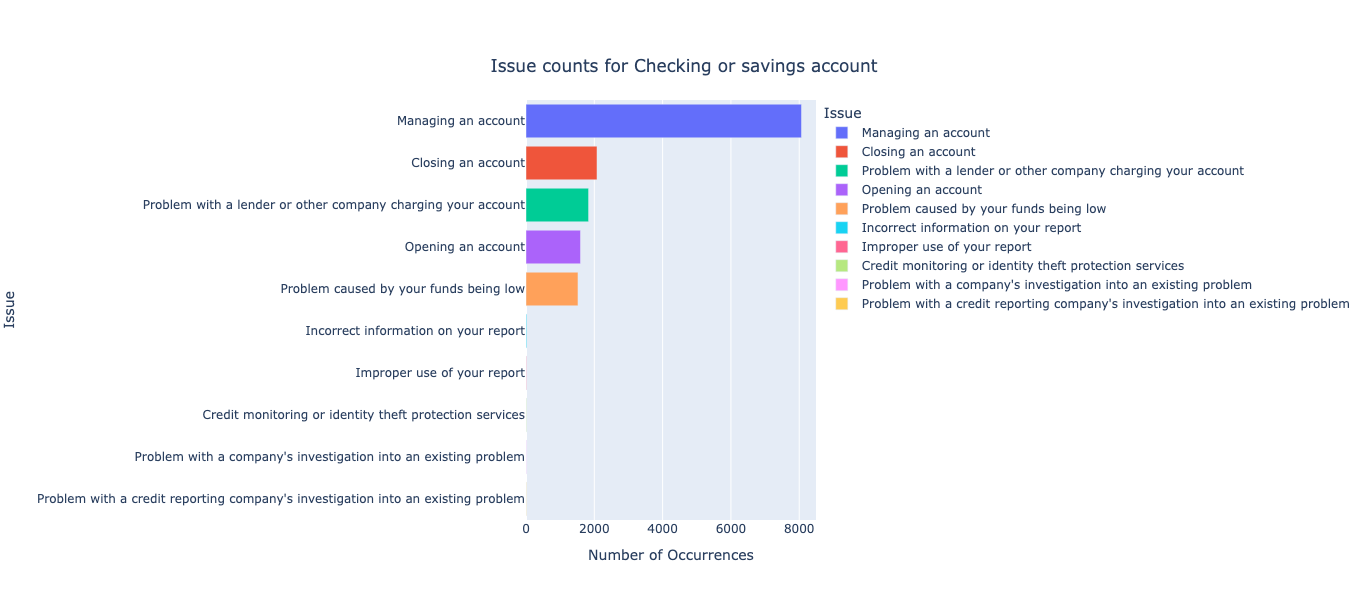

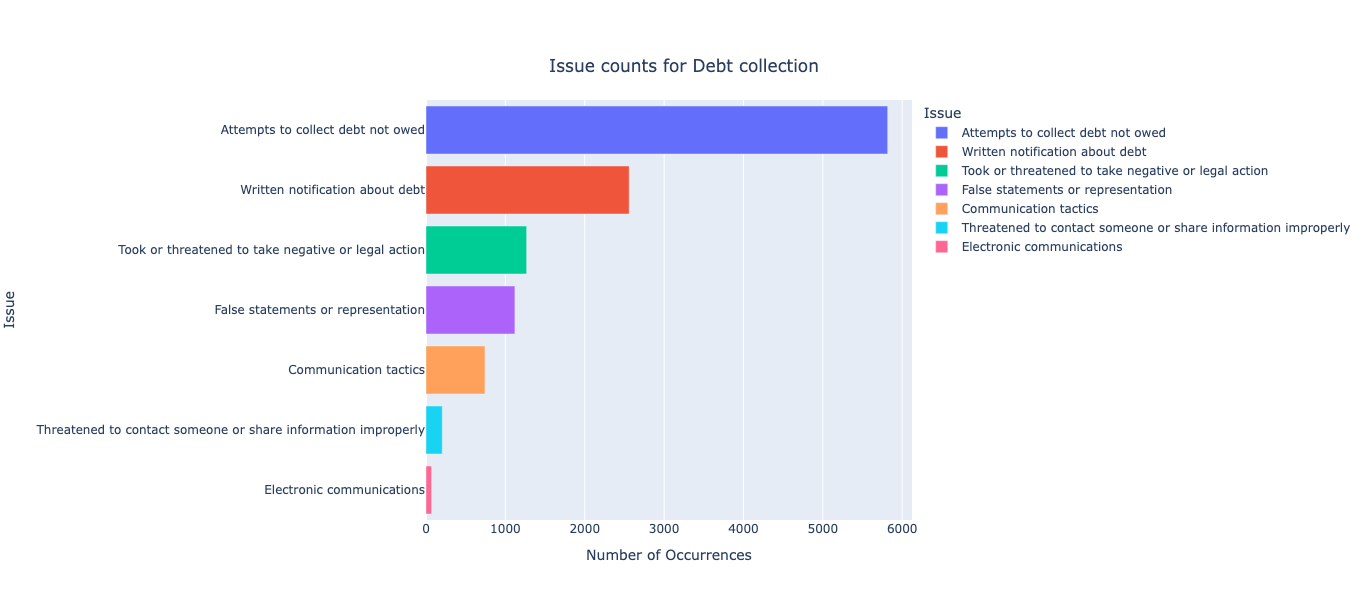

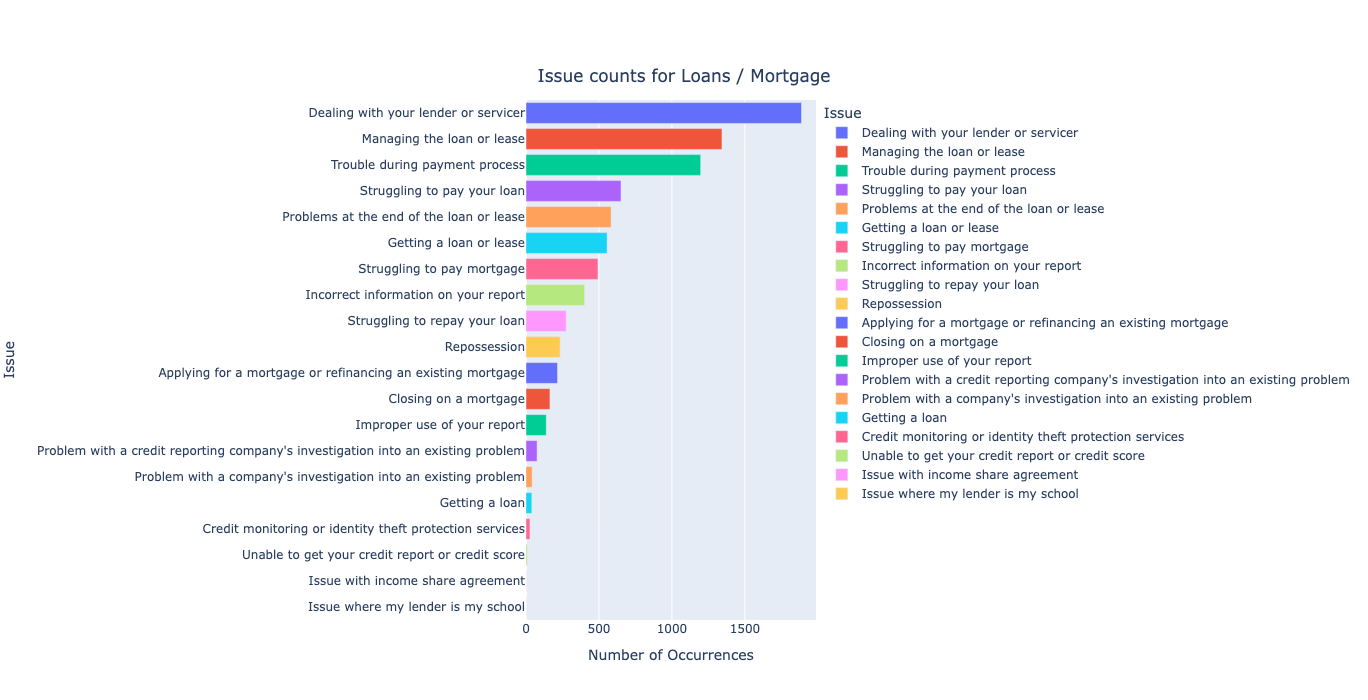

In [65]:
for i,product in enumerate(df_2023['Product'].value_counts().index):
    subproduct = df_2023[df_2023['Product'] == product]
    subproduct_counts = subproduct['Issue'].value_counts().reset_index()
    subproduct_counts.columns = ['Issue', 'Count']
    
    fig = px.bar(subproduct_counts, y='Issue', x='Count', color='Issue',
                 title=f"Issue Count for {product}",
                 width = 1400,
                 height = 600 if i!=4 else 700,
                 labels={'Count': 'Number of Occurrences'}, # Customizing axis labels
                 orientation='h') # Horizontal bars
    
    fig.update_layout(
        title={
            'text': f"Issue counts for {product}",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    
    fig.show()

#### Next steps:

1. Let's analyze all the plots carefully and I believe we can easily get rid of some of the sub-products and issues in each product since they are insignificant in number.
2. Next, we can discuss about the modeling strategies.